## 예시 : 서울시 초등학교 통계(2018~2022)

### 시각화 전략
- 시각화의 목표 : 
    - 2022년 기준으로 학생 수 top 5 지역 선택
    - 시점에 따른 학생 수, 학급 수의 변화 측정
    - 학생 수와 학급 수의 상관관계 측정
    - 시점과 지역에 따른 학교 수 비교
- 시각화의 범위 :
    - 2022년도 서울의 학생 수 top5 지역
    - 2002~2022년도
    - 초등학교
    - 학교수,학급수,학생수,교원수,직원수,교실수
- 시각화의 개발절차 :
    - data.seoul.go.kr에서 데이터 확보
    - 서울 지역의 2022년도 학생 수 top5 구분
    - 기존 데이터에서 top5를 제외한 데이터 제거
    - 분석 후 시각화

### 시각화 요구사항
- 사용자 수준 / 취향 :
    - 학생 수를 통한 출산율 판단
    - 시간에 따른 학교 규모 축소 여부 판단
- 시나리오 / 스토리보드 개발 : 
    - 시간이 흐름에 따라 학생 수의 하락세 예상
    - 학생 수의 하락에 따른 학급 수의 감소 예상
    - 학생 수 및 학급 수의 감소에 따라 학교 수도 하락세 예상

### 데이터 시각화 명세서
- 시각화 표현의 형태, 규칙, 패턴, 상호작용:
    - 시점에 따른 학생수, 학급 수 년도별 lineplot
    - 학생 수에 따른 학급 수 scatter 및 상관도 비교
    - 지역, 시점에 따른 학교수 heatmap

### 시각화 명세서 기반 설계
- 시각화 UI 설계 :
    - lineplot
        - 두 영역으로 나눔
        - 첫번째 영역의 x축은 시점(2002 ~ 2022), y축은 학생 수(0 ~ 60000)이며 단위는 명
        - 두번째 영역의 x축은 시점(2002 ~ 2022), y축은 학급 수(500 ~ 2000)이며 단위는 개
        - 지역에 따라 데이터를 나눔
        - 시간에 따른 학생 수, 학급 수의 변화 관찰
    - scatter
        - x축은 학생 수(default값), y축은 학급 수(default값)
        - 지역에 따라 데이터를 나눔
        - 학생 수와 학급 수의 상관관계 비교
    - heatmap
        - 지역은 top5인 송파구,강남구,강서구,노원구,양천구
        - x축은 시점(2002~2022), y축은 지역, 데이터는 학교 수
        - 지역, 시점에 따른 학교 수 측정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rcParams['font.family'] = [font]+current_font_list
print(matplotlib.rcParams['font.family'])

['HYGothic-Extra', 'sans-serif']


In [2]:
pd_data = pd.read_csv('초등학교_20230313160848.csv')
pd_data.drop('자치구별(1)',axis=1,inplace=True)
pd_data.rename(columns={'자치구별(2)':'자치구별'},inplace=True)
pd_data

,시점,자치구별,학교수 (개),학급수 (개),학생수 (명),교원수 (명),직원수 (명),교실수 (개)
0,2002,종로구,14,357,11775,448,79,369
1,2002,중구,12,365,12186,440,94,371
2,2002,용산구,15,439,14315,537,92,443
3,2002,성동구,15,669,24055,817,113,670
4,2002,광진구,20,776,30365,960,152,778
...,...,...,...,...,...,...,...,...
520,2022,관악구,22,658,12975,1010,113,972
521,2022,서초구,24,864,21867,1369,116,1048
522,2022,강남구,33,1021,25745,1690,151,1270
523,2022,송파구,41,1424,31536,2210,188,1741


In [3]:
pd_data['시점'] = pd_data['시점'].astype('str')
pd_data.dtypes

시점         object
자치구별       object
학교수 (개)     int64
학급수 (개)     int64
학생수 (명)     int64
교원수 (명)     int64
직원수 (명)     int64
교실수 (개)     int64
dtype: object

In [4]:
pd_group = pd_data.groupby(['자치구별','시점']).sum()
pd_group = pd_group.reset_index()
filter1 = pd_data['시점']=='2022'
data_2022 = pd_data[filter1]
data_2022 = data_2022.sort_values(by='학생수 (명)', ascending=False)
data_2022.head(5)

,시점,자치구별,학교수 (개),학급수 (개),학생수 (명),교원수 (명),직원수 (명),교실수 (개)
523,2022,송파구,41,1424,31536,2210,188,1741
522,2022,강남구,33,1021,25745,1690,151,1270
515,2022,강서구,35,1161,24468,1732,168,1463
510,2022,노원구,42,1163,23991,1703,234,1680
514,2022,양천구,30,1008,22998,1492,146,1293


In [5]:
top5_2022 = ['송파구','강남구','강서구','노원구','양천구']
top5_data = pd.DataFrame({'시점':[],
                       '자치구별':[],
                       '학교수 (개)':[],
                       '학급수 (개)':[],
                       '학생수 (명)':[],
                       '교원수 (명)':[],
                       '직원수 (명)':[], 
                       '교실수 (개)':[],})
for n in top5_2022:
    filter1 = pd_data['자치구별']==n
    top5 = pd_data[filter1]
    top5_data = pd.concat([top5_data,top5])
top5_data = top5_data.reset_index()
top5_data.drop('index',axis=1,inplace=True)
top5_data

,시점,자치구별,학교수 (개),학급수 (개),학생수 (명),교원수 (명),직원수 (명),교실수 (개)
0,2002,송파구,33.0,1390.0,50171.0,1716.0,235.0,1396.0
1,2003,송파구,33.0,1365.0,49407.0,1705.0,221.0,1403.0
2,2004,송파구,33.0,1319.0,46175.0,1648.0,208.0,1433.0
3,2005,송파구,33.0,1301.0,43609.0,1647.0,197.0,1451.0
4,2006,송파구,33.0,1295.0,42093.0,1665.0,200.0,1447.0
...,...,...,...,...,...,...,...,...
100,2018,양천구,30.0,1029.0,24481.0,1526.0,153.0,1328.0
101,2019,양천구,30.0,1019.0,24414.0,1533.0,147.0,1328.0
102,2020,양천구,30.0,1010.0,23985.0,1555.0,147.0,1328.0
103,2021,양천구,30.0,1006.0,23469.0,1503.0,146.0,1322.0


C:\Users\ITPS\AppData\Local\Temp\ipykernel_6460\2193479529.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(pd_data['시점'].unique(),rotation=45)
C:\Users\ITPS\AppData\Local\Temp\ipykernel_6460\2193479529.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(top5_data['시점'].unique(),rotation=45)


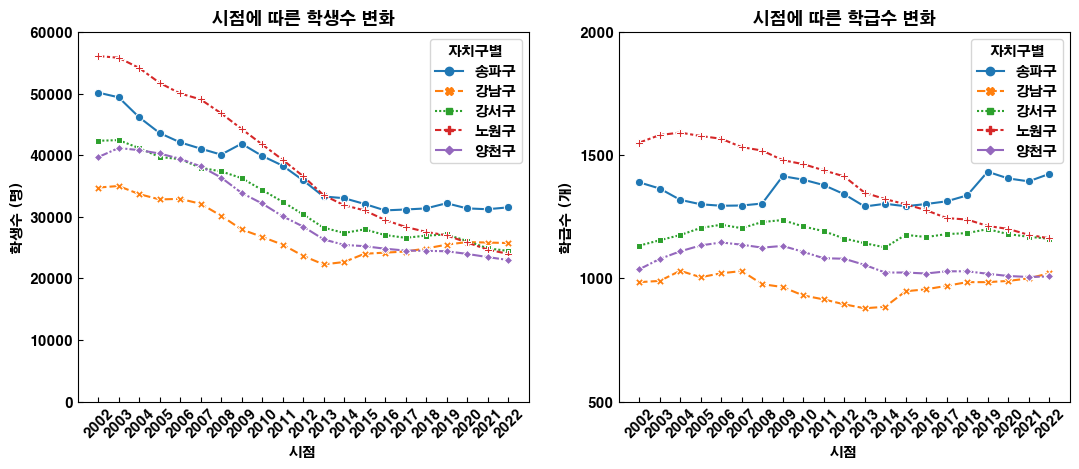

In [18]:
fig = plt.figure(figsize=(6.4*2,4.8))
a = fig.add_subplot(1,2,1)
sns.lineplot(data=top5_data, x='시점', y='학생수 (명)', hue='자치구별',style='자치구별', markers = True, ax=a)
a.set_title('시점에 따른 학생수 변화')
a.set_xticklabels(pd_data['시점'].unique(),rotation=45)
a.set_yticks(np.linspace(0,60000,7))
a.tick_params(direction='in')

b = fig.add_subplot(1,2,2)
sns.lineplot(data=top5_data, x='시점', y='학급수 (개)', hue='자치구별',style='자치구별', markers = True ,ax=b)
b.set_title('시점에 따른 학급수 변화')
b.set_xticklabels(top5_data['시점'].unique(),rotation=45)
b.set_yticks(np.linspace(500,2000,4))
b.tick_params(direction='in')

0.71761256093605

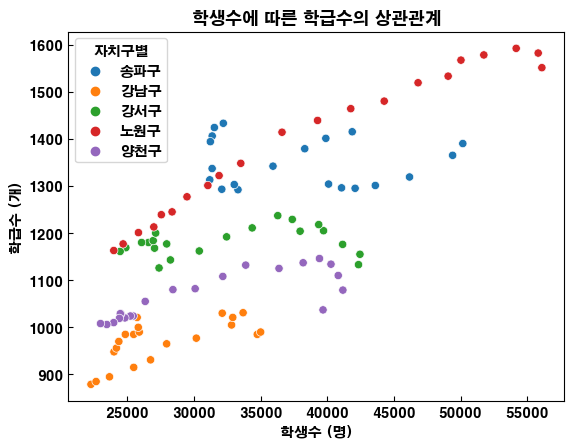

In [26]:
fig = plt.figure(figsize=(6.4,4.8))
c = fig.add_subplot()
sns.scatterplot(data=top5_data, x='학생수 (명)', y='학급수 (개)', hue='자치구별',ax=c)
c.set_title('학생수에 따른 학급수의 상관관계')
c.tick_params(direction='in')
np.corrcoef(top5_data['학생수 (명)'],top5_data['학급수 (개)'])[0,1]

C:\Users\ITPS\AppData\Local\Temp\ipykernel_6460\1164437605.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(data=top5_data.pivot('시점','자치구별','학교수 (개)'), annot=True, fmt='.0f', ax=d)


<AxesSubplot: xlabel='자치구별', ylabel='시점'>

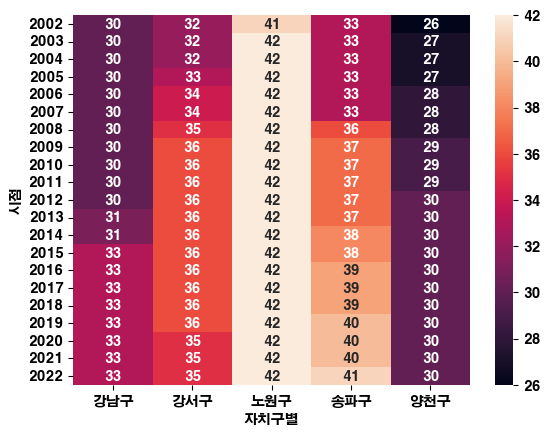

In [13]:
fig = plt.figure(figsize=(6.4,4.8))
d = fig.add_subplot()
sns.heatmap(data=top5_data.pivot('시점','자치구별','학교수 (개)'), annot=True, fmt='.0f', ax=d)